## EDA and Visualisations

In [117]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sb.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [118]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**age** : age of the patient

**sex** : sex of the patient

**cp** : chest pain type
    
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic
    
**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholesterol in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg** : resting electrocardiographic results
    
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
**thalachh** : maximum heart rate achieved

**exng** : exercise induced angina (1 = yes; 0 = no)

**oldpeak** : previous peak

**slp** : slope

**caa** : number of major vessels (0-3)

**thall** : thal rate

**output** : target variable (0 = less chance of heart attack; 1 = more chance of heart attack)

In [102]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
output        0.544554
dtype: float64

The above cell calculates the mean for all variables in the dataset. However, the mean holds no meaning for the variables **sex, cp, restecg, exng, caa** and **output** as these are categorical variables.

In [48]:
df.median()

age          55.0
sex           1.0
cp            1.0
trtbps      130.0
chol        240.0
fbs           0.0
restecg       1.0
thalachh    153.0
exng          0.0
oldpeak       0.8
slp           1.0
caa           0.0
thall         2.0
output        1.0
dtype: float64

The above cell calculates the median for all variables in the dataset. However, the median holds no meaning for the variables **sex, cp, restecg, exng, caa** and **output** as these are categorical variables.

1    165
0    138
Name: output, dtype: int64


<AxesSubplot:xlabel='output', ylabel='count'>

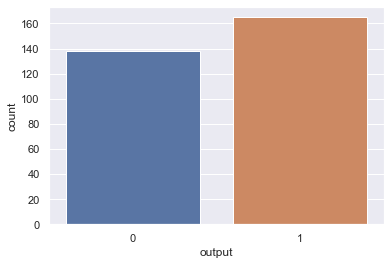

In [49]:
print(df["output"].value_counts())
sb.countplot(x ='output', data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

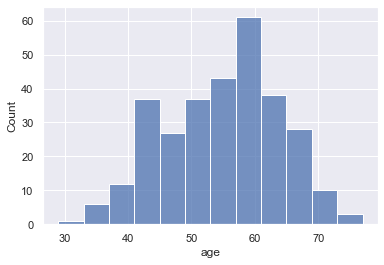

In [50]:
sb.histplot(data=df, x="age")

1    207
0     96
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

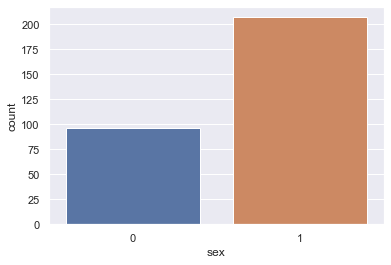

In [51]:
print(df["sex"].value_counts())
sb.countplot(x ='sex', data = df)

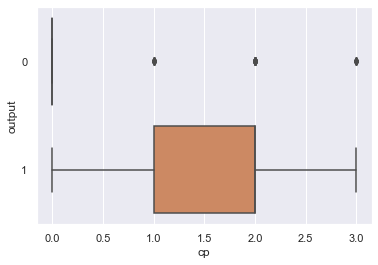

In [52]:
sb.boxplot(data=df, x="cp", y="output", orient='h')
sb.set(rc = {'figure.figsize':(8,4)})

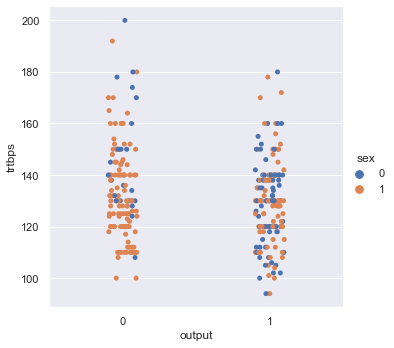

In [53]:
sb.catplot(data=df, x="output", y="trtbps", hue="sex")

<AxesSubplot:xlabel='output', ylabel='trtbps'>

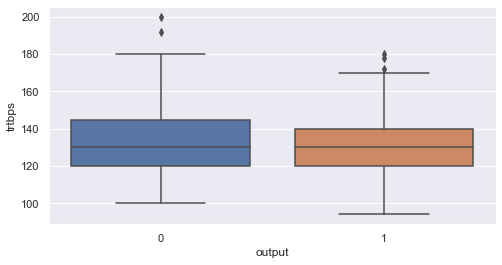

In [54]:
sb.boxplot(data=df, x="output", y="trtbps")

Indicates **no clear correlation** between resting blood pressure and chance of getting a heart attack

<AxesSubplot:xlabel='output', ylabel='chol'>

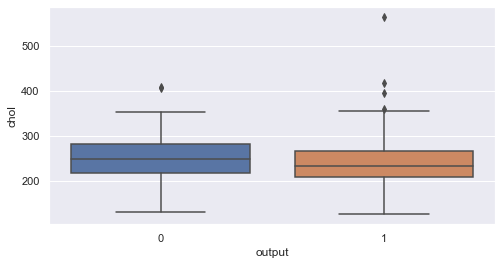

In [55]:
sb.boxplot(data=df, x="output", y="chol")

Indicates **no clear correlation** between cholesterol and chance of getting a heart attack

<AxesSubplot:>

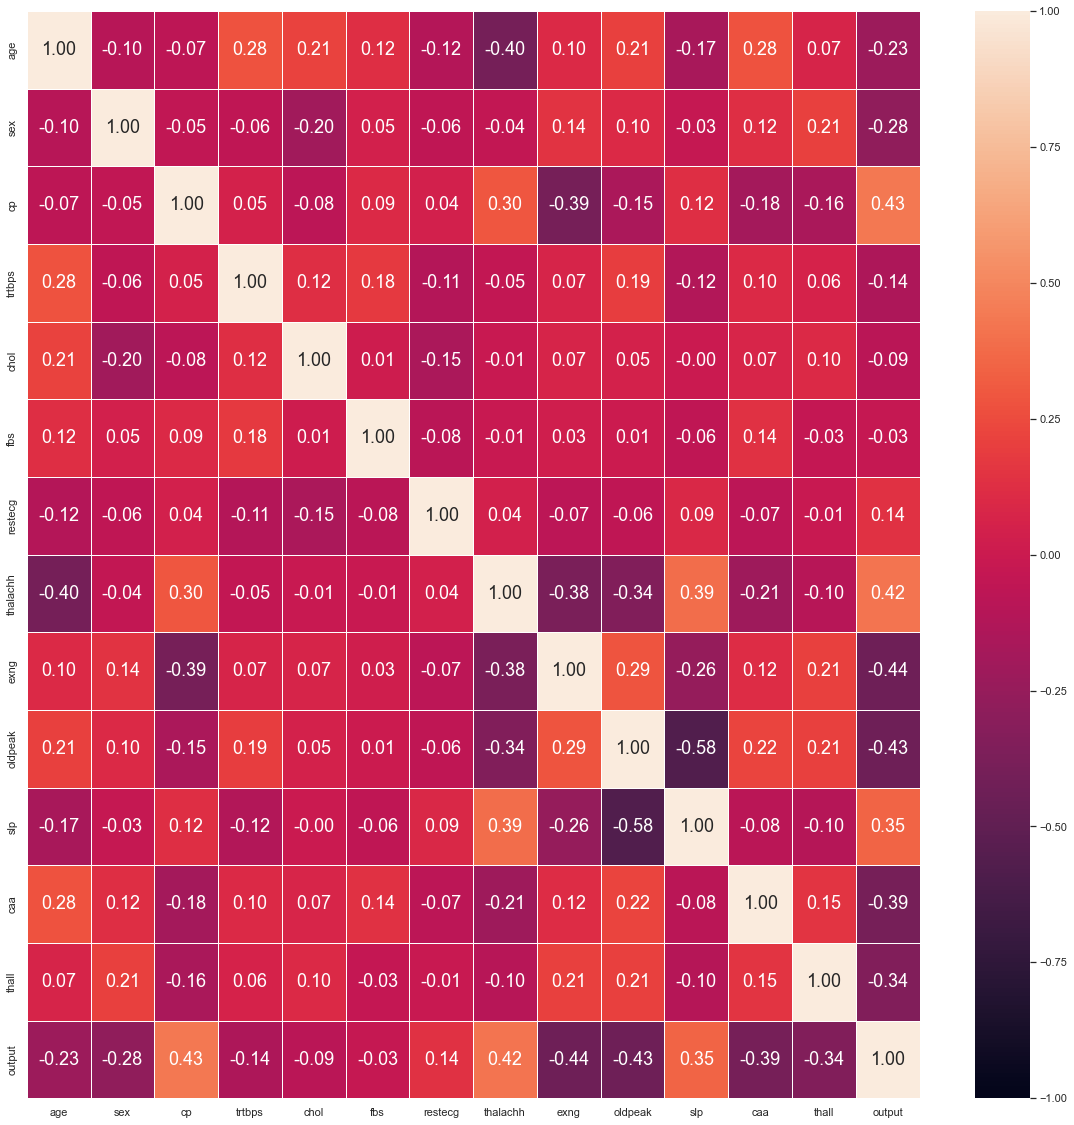

In [56]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18})

Selecting an arbitrary threshold of 0.2, variables which have a correlation with the output that is >0.2 can be be considered as significant in predicting susceptibility to heart attacks. These variables are: **age, sex, cp, thalachh, exng, oldpeak, slp, caa** and **thall**.

## Machine Learning

### Logistic Regression and Random Forest Classification

In [119]:
# Importing essential models and functions from sklearn
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression

In [120]:
# Extracting necessary variables in a pandas DataFrame for the Logistic Regression section
df2 = pd.DataFrame(df[['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']])
df2

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
300,68,1,0,141,0,3.4,1,2,3,0
301,57,1,0,115,1,1.2,1,1,3,0


In [121]:
# Creating dummy variables (variables with only two values - 0 and 1)
cat_vars = ['age', 'sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
for var in cat_vars:
    cat_list ='var'+'_' + var
    cat_list = pd.get_dummies(df[var], prefix = var)
    df3 = df2.join(cat_list)
    df2 = df3
data_vars = df2.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

Our final data columns are as follows:

In [122]:
data_final = df2[to_keep]
data_final.columns.values

array(['output', 'age_29', 'age_34', 'age_35', 'age_37', 'age_38',
       'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44',
       'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50',
       'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56',
       'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62',
       'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68',
       'age_69', 'age_70', 'age_71', 'age_74', 'age_76', 'age_77',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thalachh_71',
       'thalachh_88', 'thalachh_90', 'thalachh_95', 'thalachh_96',
       'thalachh_97', 'thalachh_99', 'thalachh_103', 'thalachh_105',
       'thalachh_106', 'thalachh_108', 'thalachh_109', 'thalachh_111',
       'thalachh_112', 'thalachh_113', 'thalachh_114', 'thalachh_115',
       'thalachh_116', 'thalachh_117', 'thalachh_118', 'thalachh_120',
       'thalachh_121', 'thalachh_122', 'thalachh_123', 'thalachh_124',
       'thalachh_125', 'thalachh_126', 

In [123]:
from sklearn.model_selection import train_test_split

X = data_final.loc[:, data_final.columns != 'output']
y = data_final.loc[:, data_final.columns == 'output']

#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Recursive Feature Elimination (RFE)** is based on the concept of continually building a model and selecting either the best or worst performing feature, setting it aside, and restarting the process with the remaining features. This procedure is repeated until the dataset's features have been exhausted. The purpose of RFE is to pick features by considering fewer and smaller sets of features in a recursive manner.

In the following cell, we perform RFE.

In [124]:
data_final_vars = data_final.columns.values.tolist()
y = ['output']
X = [i for i in data_final_vars if i not in y]

# Importing essential models and functions from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()# Creating LogisticRegression object

rfe = RFE(logreg, n_features_to_select = 15)# Creating RFE object
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

extracted_features = []
for i in range(0, len(rfe.support_)):
    if rfe.support_[i] == True:
        extracted_features.append(data_final.columns.values[i+1])
        
print(extracted_features)

[False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False  True False  True False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False  True False False False False False False Fa

Thus, with the help of RFE, we have extracted the top factors affecting our dependent variable, output. These variables can be seen in the list above.

In [125]:
X = X_train[extracted_features]
y = y_train['output']

In [126]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.249583
         Iterations: 35
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.637     
Dependent Variable:    output             AIC:                135.8234  
Date:                  2022-11-05 14:50   BIC:                186.1722  
No. Observations:      212                Log-Likelihood:     -52.912   
Df Model:              14                 LL-Null:            -145.59   
Df Residuals:          197                LLR p-value:        5.3124e-32
Converged:             0.0000             Scale:              1.0000    
No. Iterations:        35.0000                                          
------------------------------------------------------------------------
              Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
age_47        -4.5324     1.5244 -2.9732 0.0029      -7.5201     -1.5446
age_59        

In [127]:
#cols = ['age_47', 'age_52', 'cp_0', 'thalachh_105', 'thalachh_158', 'thalachh_161', 'slp_2', 'caa_1', 'caa_2', 'thall_2']
extracted_features.remove('sex_0')
extracted_features.remove('oldpeak_0.2')
extracted_features.remove('oldpeak_3.6')
extracted_features.remove('thall_2')

X = X_train[extracted_features]
y = y_train['output']
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.288773
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.579     
Dependent Variable: output           AIC:              144.4397  
Date:               2022-11-05 14:51 BIC:              181.3621  
No. Observations:   212              Log-Likelihood:   -61.220   
Df Model:           10               LL-Null:          -145.59   
Df Residuals:       201              LLR p-value:      5.0771e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age_47        -4.1593    1.4225  -2.9240  0.0035  -6.9473  -1.3713
age_59        -3.3950    1.4398  -2.3579  0.0184  -6.2170  -0.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [129]:
# Predicting the test dataset results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


True Positive Rate:	 0.9230769230769231
False Positive Rate:	 0.2
True Negative Rate:	 0.8
False Negative Rate:	 0.07692307692307693


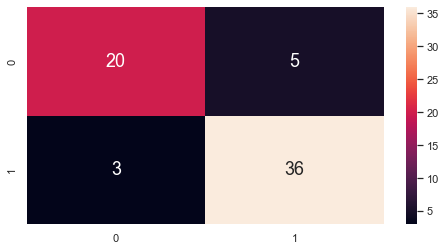

In [130]:
from sklearn.metrics import confusion_matrix

# Plotting the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.heatmap(confusion_matrix, annot = True, fmt=".0f", annot_kws={"size": 18})

TN = confusion_matrix[0][0]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN) 
TNR = TN/(TN+FP)

print("True Positive Rate:\t", TPR)
print("False Positive Rate:\t", FPR)
print("True Negative Rate:\t", TNR)
print("False Negative Rate:\t", FNR)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.88      0.92      0.90        39

    accuracy                           0.88        64
   macro avg       0.87      0.86      0.87        64
weighted avg       0.87      0.88      0.87        64



Another typical tool used with binary classifiers is the **receiver operating characteristic (ROC) curve**. The ROC curve of a simply random classifier is represented by the dotted line; a good classifier stays as far away from that line as feasible (toward the top-left corner).

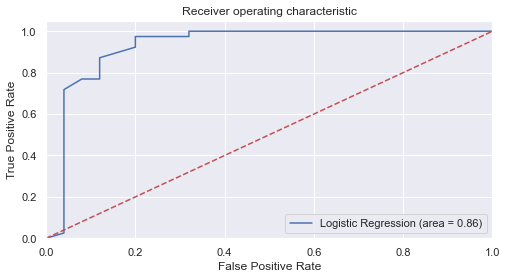

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Random Forest

In [ ]:
# Re-reading the dataset to elimate any changes made previously 
df4 = pd.read_csv("heart.csv")

In [ ]:
# Define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Encoding the categorical columns
df4 = pd.get_dummies(df4, columns = cat_cols, drop_first = True)

# Defining the features and target
X = df4.drop(['output'],axis=1)
y = df4[['output']]

# Instantiating the scaler
scaler = RobustScaler()

# Scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Splitting the data into the train and test sets with new variable names for Random Forest Classification
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
# Initializing the object of the RandomForestClassifier class
rf = RandomForestClassifier()

# Fitting the model
rf.fit(X_train_rf, y_train_rf)

# Calculating the predictions
y_pred_rf = rf.predict(X_test_rf)

# Printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test_rf, y_pred_rf))

The test accuracy score of Random Forest is  0.8351648351648352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
# Printing the classification report for the Random Forest Classifier 
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

